# Computer Vision applications with Neural Networks

<div>
<iframe src="https://slides.com/naresh-ub/cvip-lec-10/embed" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div>

```{admonition} Run this webpage in Google Colab using the <i class="fas fa-rocket"></i> icon.
:class: warning
This lecture notes uses packages including pytorch, torchvision. Use Google Colab icon to run the code.
```

In this section, we transition from classical vision techniques to modern **data-driven learning** methods: neural networks.

The core idea is simple: a neural network is a **trainable function approximator**. It can learn to represent very complex mappings by adjusting its internal parameters.

---

## What is a Function?

A function is a rule that maps an input $x$ to an output $y$:

$$
y = f(x)
$$

Examples:
- A straight line: $y = 2x + 1$
- A nonlinear curve: $y = \sin(x)$

In practice, we often do not know the exact form of $f$. Instead, we have **data**:

$$
\{(x_i, y_i)\}_{i=1}^N
$$

Our goal is to learn an **approximate** function $\hat{f}(x)$ that predicts $y$ for new inputs.

---

## Why Use Neural Networks?

Neural networks can learn to approximate highly complex, nonlinear functions. They do this by combining **simple linear transformations** with **nonlinear activation functions**.

---

A basic neural network:

- Takes input $x$.
- Applies a sequence of linear operations (weights and biases).
- Passes intermediate results through nonlinearities (activation functions like $\tanh$, ReLU).
- Outputs a prediction $\hat{y}$.

---

## Universal Approximation Theorem

Mathematically, it can be shown that a feed-forward neural network with at least one hidden layer and nonlinear activation can approximate any continuous function on compact subsets of $\mathbb{R}^n$ to arbitrary precision, given enough hidden units.

This result is called the **Universal Approximation Theorem**.

---

## How Does a Neural Network Learn?

A neural network learns by minimizing a **loss function** $L$. The loss function measures how far the predicted outputs $\hat{y}$ are from the true targets $y$.

One common choice for regression is **Mean Squared Error (MSE)**:

$$
L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2.
$$

The goal is to find weights and biases that minimize $L$.

---

## Gradient Descent

To minimize the loss, we use **gradient descent**. We compute the partial derivatives of $L$ with respect to each parameter.

Then, we update each parameter in the direction that reduces the loss:

$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}
$$

where $\eta$ is the learning rate.

---

Putting these pieces together, a neural network **learns** to approximate a function by adjusting its parameters to reduce prediction errors on training data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_and_true_function(X, Y_true, true_func, title="Target Function and Samples"):
    plt.figure(figsize=(8, 4))
    plt.scatter(X, Y_true, s=10, label='Noisy samples')
    plt.plot(X, true_func, 'r-', label='True function')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_final_results(X, Y_true, Y_pred, true_func, loss_history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0].scatter(X, Y_true, s=10, label='Training data')
    ax[0].plot(X, true_func, 'r-', label='True $\\sin(x)$')
    ax[0].plot(X, Y_pred, 'g-', label='NN Prediction')
    ax[0].set_xlabel("$x$")
    ax[0].set_ylabel("$y$")
    ax[0].set_title("Function Approximation by Neural Network")
    ax[0].legend()

    ax[1].plot(loss_history)
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("MSE Loss")
    ax[1].set_title("Training Loss over Epochs")

    plt.tight_layout()
    plt.show()

Epoch 0, Loss: 0.521049
Epoch 200, Loss: 0.429979
Epoch 400, Loss: 0.420302
Epoch 600, Loss: 0.406629
Epoch 800, Loss: 0.381505
Epoch 1000, Loss: 0.342459
Epoch 1200, Loss: 0.296166
Epoch 1400, Loss: 0.251691
Epoch 1600, Loss: 0.214216
Epoch 1800, Loss: 0.184992


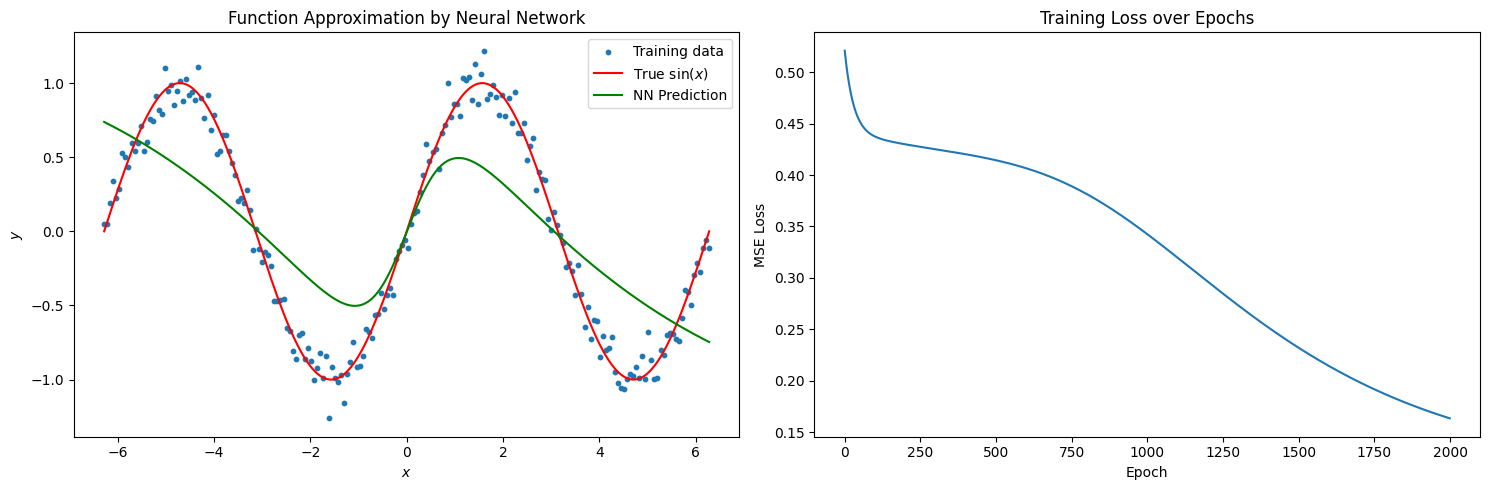

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# 1) Generate data
X = np.linspace(-2 * np.pi, 2 * np.pi, 200).reshape(-1, 1)
Y_true = np.sin(X) + 0.1 * np.random.randn(*X.shape)

# 2) Define simple feed-forward network
input_dim = 1
hidden_dim = 10
output_dim = 1

# Initialize weights and biases
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

# Activation function: tanh
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Hyperparameters
learning_rate = 0.01
epochs = 2000

# Store loss over epochs
loss_history = []

# 3) Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = tanh(Z1)
    Z2 = A1 @ W2 + b2
    Y_pred = Z2

    # Compute MSE loss
    loss = np.mean((Y_true - Y_pred) ** 2)
    loss_history.append(loss)

    # Backward pass
    dZ2 = -(Y_true - Y_pred)
    dW2 = A1.T @ dZ2 / X.shape[0]
    db2 = np.mean(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = X.T @ dZ1 / X.shape[0]
    db1 = np.mean(dZ1, axis=0, keepdims=True)

    # Gradient descent update
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# 4) Final side-by-side plots
plot_final_results(X, Y_true, Y_pred, np.sin(X), loss_history)

## Interpretation

In this example:

- We used a small feed-forward network with one hidden layer and a $\tanh$ activation function.
- The training data is noisy samples from $y = \sin(x)$.
- The network learns to approximate this function by minimizing the mean squared error.
- As training progresses, the prediction curve approaches the true $\sin(x)$.
- The loss decreases steadily, showing that the network is finding better parameters.

---

This simple experiment illustrates the fundamental principle of neural networks as **trainable universal function approximators**.

In real applications, we use deeper networks, more sophisticated optimizers, and vectorized frameworks like PyTorch or TensorFlow.

Next, we will apply these ideas to images: understanding how neural networks extract patterns in pixels to solve real computer vision tasks.

# Multi-dimensional Inputs and Decision Boundaries

Before we classify images, we must understand how a neural network handles **multi-dimensional input vectors**.

---

## What is a Multi-dimensional Input?

In 1D, the input $x$ is a single number.  
In 2D or 3D, the input is a **vector**:

- 2D: $x = [x_1, x_2]$
- 3D: $x = [x_1, x_2, x_3]$

These vectors define points in a 2D plane or 3D space.

---

## Example: Binary Classification in 2D

Suppose we want to classify whether a point belongs to **class 0** or **class 1** based on its coordinates $(x_1, x_2)$.

A simple model:
- A **linear layer** with weights $w$ and bias $b$.
- A **sigmoid** activation to squash output to [0, 1].

The model output is:

$$
\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)
$$

The **decision boundary** is where $\hat{y} = 0.5$:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

This is the equation of a **line** in 2D.  
In 3D, the boundary becomes a **plane**:

$$
w_1 x_1 + w_2 x_2 + w_3 x_3 + b = 0.
$$

---

## Neural Networks Learn These Boundaries

A neural network adjusts its weights to position this line (or plane) to best separate the data points into classes.

- For simple linear models: the boundary is linear.
- For deeper networks: multiple layers and nonlinearities bend the boundary into curves or complex surfaces.

---

Below is a **toy example**:  
- A small 2D dataset.
- A simple fully connected model.
- The learned decision boundary visualized.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def plot_2d_data(X, y):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("2D Classification Data")
    plt.legend()
    plt.show()

def plot_decision_boundary(X, y, W, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = sigmoid(grid @ W + b)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Decision Boundary")
    plt.legend()
    plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Epoch 0, Loss: 2.3272
Epoch 100, Loss: 0.2101
Epoch 200, Loss: 0.1956
Epoch 300, Loss: 0.1929
Epoch 400, Loss: 0.1922
Epoch 500, Loss: 0.1919
Epoch 600, Loss: 0.1918
Epoch 700, Loss: 0.1918
Epoch 800, Loss: 0.1918
Epoch 900, Loss: 0.1918


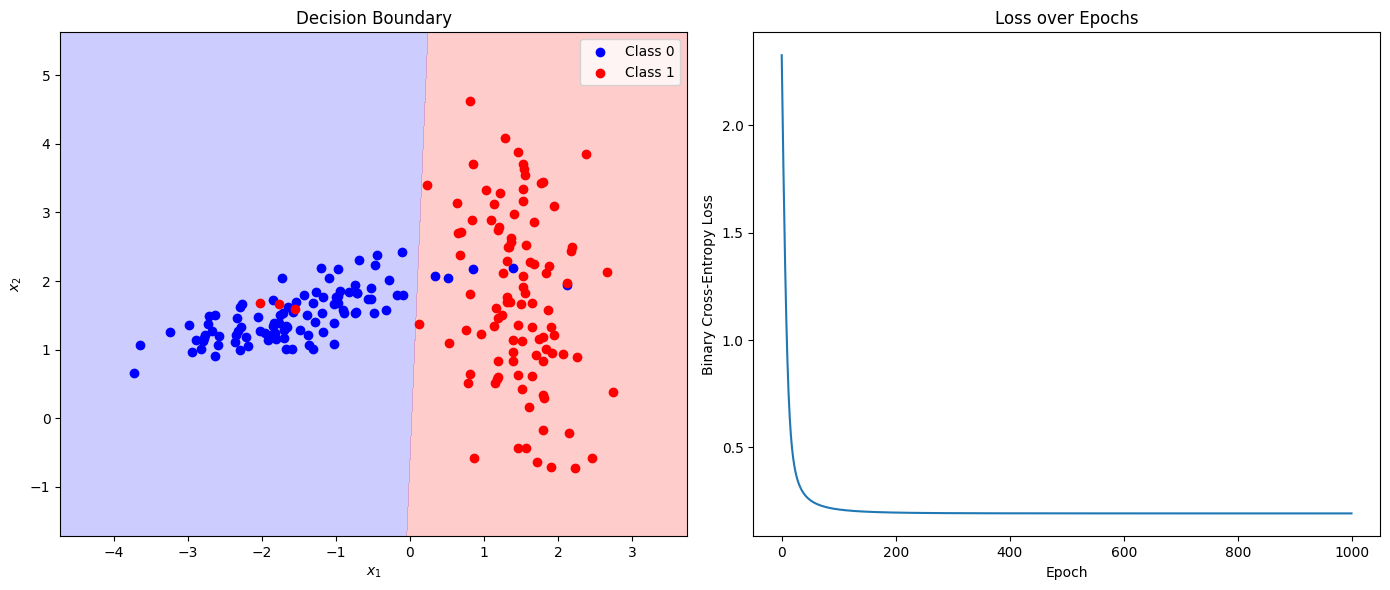

In [4]:
np.random.seed(0)

# Generate toy 2D dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0.05, class_sep=1.5
)

# plot_2d_data(X, y)

# Reshape labels for computation
y = y.reshape(-1, 1)

# Initialize weights and bias
W = np.random.randn(2, 1)
b = np.zeros((1,))

# Training hyperparameters
lr = 0.1
epochs = 1000

# Training loop: logistic regression by hand
loss_history = []

for epoch in range(epochs):
    # Forward pass
    Z = X @ W + b
    y_hat = sigmoid(Z)

    # Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))
    loss_history.append(loss)

    # Gradients
    dZ = y_hat - y
    dW = X.T @ dZ / X.shape[0]
    db = np.mean(dZ)

    # Update
    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

import matplotlib.pyplot as plt

# Create meshgrid for decision boundary again
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = sigmoid(grid @ W + b)
Z = Z.reshape(xx.shape)

# Combined plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Decision boundary
ax[0].contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
ax[0].scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], c='blue', label='Class 0')
ax[0].scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], c='red', label='Class 1')
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$x_2$")
ax[0].set_title("Decision Boundary")
ax[0].legend()

# Loss curve
ax[1].plot(loss_history)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Binary Cross-Entropy Loss")
ax[1].set_title("Loss over Epochs")

plt.tight_layout()
plt.show()

# Image Classification with Fully Connected Neural Networks

---

## Why Use Images?

In computer vision, the input $x$ is no longer a single number or vector of features but an **image**.

An image is a matrix (or tensor for RGB):
- A **grayscale image** is a 2D matrix of pixel intensities.
- A **color image** is a 3D tensor: height × width × channels.

---

## How to Use Pixels?

We can treat the pixel values directly as input features.

For example:
- A $28 \times 28$ grayscale image $\rightarrow$ 784-dimensional vector.
- A $32 \times 32$ RGB image $\rightarrow$ 3,072-dimensional vector.

The simplest idea:
- **Flatten** the image matrix into a vector.
- Feed this vector into a fully connected network.
- Predict the output label.

---

## Why Use Activation Functions?

A layer without activation is just a linear mapping:

$$
z = Wx + b
$$

Multiple linear layers without nonlinearity collapse into a single linear mapping.

To learn **nonlinear decision boundaries**, we need **nonlinear activation functions**:

- Common choice: **ReLU** (Rectified Linear Unit)
  - $ \text{ReLU}(x) = \max(0, x) $
  - Makes the network piecewise linear, allowing it to approximate complex functions.

---

## Output Layer & Softmax

For **multi-class classification**, the output must represent a valid probability distribution over classes.

We use **softmax**:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

Softmax converts raw scores to probabilities summing to 1.

---

## Loss Function: Cross-Entropy

To train the network, we compare predicted probabilities with the true labels using **categorical cross-entropy**:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic})
$$

- $y_{ic}$ is 1 if sample $i$ belongs to class $c$, else 0.
- $\hat{y}_{ic}$ is the predicted probability for class $c$.

Minimizing cross-entropy encourages the network to increase the probability for the correct class.

---

## Basic Processing Steps

1. Load image data and labels.
2. Normalize pixel values (0–255) to [0, 1].
3. Flatten images to 1D vectors.
4. Train a small fully connected neural network.
5. Predict class labels.

---

## Important Considerations

- Fully connected layers **ignore spatial structure**. Nearby pixels are treated the same as distant pixels.
- This works poorly for complex images.
- Still, it is a good starting point to see the limitations.

Later, we will see how **CNNs** improve by using local patterns.

---

## Workflow

**Input Image** → **Flatten** → **Fully Connected Layers** → **Softmax** → **Class Probabilities**

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Transforms
transform_gray = transforms.ToTensor()
transform_rgb = transforms.ToTensor()

# Class labels
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

cifar_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

def plot_samples(images, labels, class_names, n=10, grayscale=True):
    plt.figure(figsize=(15, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        img = images[i]
        if grayscale:
            plt.imshow(img.squeeze().numpy(), cmap="gray")
        else:
            img = img.permute(1, 2, 0).numpy()
            plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

Device: cuda


Loading Fashion MNIST...


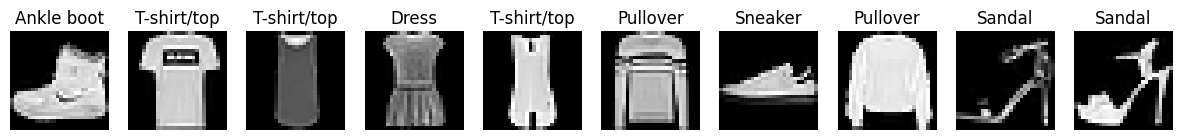

Epoch 1, Loss: 2.3252, Accuracy: 0.1069
Epoch 2, Loss: 2.2743, Accuracy: 0.1572
Epoch 3, Loss: 2.2327, Accuracy: 0.2131
Epoch 4, Loss: 2.1959, Accuracy: 0.2476
Epoch 5, Loss: 2.1609, Accuracy: 0.2873

Loading CIFAR-10...


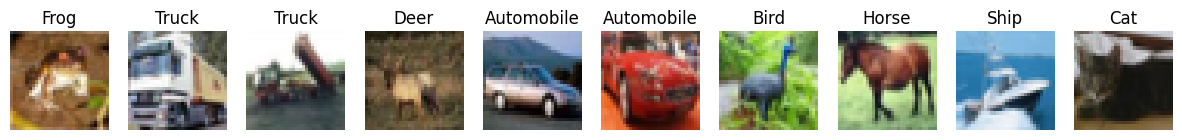

Epoch 1, Loss: 2.3080, Accuracy: 0.1131
Epoch 2, Loss: 2.2891, Accuracy: 0.1101
Epoch 3, Loss: 2.2787, Accuracy: 0.1294


In [11]:
# --------------------------
# 1) Fashion MNIST (Grayscale)
# --------------------------
print("Loading Fashion MNIST...")
train_f = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=transform_gray, download=True)

trainloader_f = torch.utils.data.DataLoader(train_f, batch_size=len(train_f))
data_f = next(iter(trainloader_f))
X_train_f, y_train_f = data_f

plot_samples(X_train_f[:10], y_train_f[:10], fashion_labels, grayscale=True)

X_train_f_flat = X_train_f.view(X_train_f.size(0), -1).to(device)
y_train_f = y_train_f.to(device)

input_dim_f = X_train_f_flat.shape[1]
output_dim_f = len(fashion_labels)
hidden_dim = 128

model_f = nn.Sequential(
    nn.Linear(input_dim_f, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim_f)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_f.parameters(), lr=0.1)

epochs = 5

for epoch in range(epochs):
    logits = model_f(X_train_f_flat)
    loss = loss_fn(logits, y_train_f)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(logits, 1)
    acc = (predicted == y_train_f).float().mean().item()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

# --------------------------
# 2) CIFAR-10 (RGB)
# --------------------------
print("\nLoading CIFAR-10...")
train_c = torchvision.datasets.CIFAR10(
    root="./data", train=True, transform=transform_rgb, download=True)

trainloader_c = torch.utils.data.DataLoader(train_c, batch_size=len(train_c))
data_c = next(iter(trainloader_c))
X_train_c, y_train_c = data_c

plot_samples(X_train_c[:10], y_train_c[:10], cifar_labels, grayscale=False)

X_train_c_flat = X_train_c.view(X_train_c.size(0), -1).to(device)
y_train_c = y_train_c.to(device)

input_dim_c = X_train_c_flat.shape[1]
output_dim_c = len(cifar_labels)
hidden_dim = 256

model_c = nn.Sequential(
    nn.Linear(input_dim_c, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim_c)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_c.parameters(), lr=0.05)

epochs = 3

for epoch in range(epochs):
    logits = model_c(X_train_c_flat)
    loss = loss_fn(logits, y_train_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(logits, 1)
    acc = (predicted == y_train_c).float().mean().item()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

# Why Do Convolutional Neural Networks (CNNs) Improve Image Classification?

---

## The Problem with Raw Pixels

A fully connected neural network takes all input pixels, flattens them into a **1D vector**, and tries to find patterns by learning weights for each pixel independently.

This works for very simple data — but:

- Nearby pixels are treated the same as faraway pixels.
- The network cannot easily learn that local groups of pixels form edges or textures.
- It needs a huge number of parameters to discover basic patterns that humans easily spot.

---

## The Power of Features

What if we **extract useful local features first**?

For images:
- Edges
- Corners
- Textures
- Local shapes

This is what a **convolutional layer** does: it scans the image with small filters (kernels) that learn to detect these **local patterns**.

---

## How a Convolutional Layer Works

A convolutional layer:

- Slides a small filter (e.g., 3×3 or 5×5) over the image.
- Computes a dot product at each location.
- Produces a new image-like output called a **feature map**.
- Each filter learns to respond strongly to certain local features: horizontal lines, vertical edges, curves, etc.

---

## Adding Convolution to a Neural Network

By adding **just one convolutional layer** before the dense layers:

- We force the network to learn **local spatial patterns**.
- The feature maps keep the spatial structure.
- The following dense layers now learn **from features**, not raw pixels.

This makes training more efficient and usually improves accuracy significantly.

---

## What We Will Do

In this notebook, we will:

1. Use **Fashion MNIST** with a simple dense network (**baseline**).
2. Add **one convolutional layer** before flattening, keeping the rest the same.
3. Compare performance.

This demonstrates how **even minimal feature extraction** helps the same basic classifier work better.

Loading Fashion MNIST...


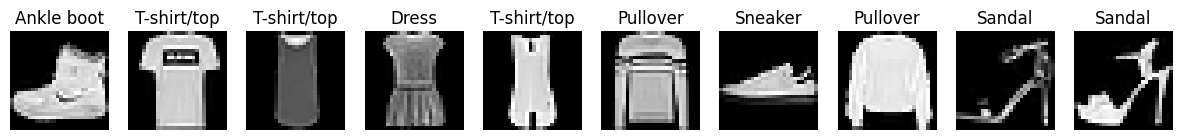


Training with one convolutional layer...
Epoch 1, Loss: 2.2945, Accuracy: 0.1036
Epoch 2, Loss: 2.2149, Accuracy: 0.1725
Epoch 3, Loss: 2.1410, Accuracy: 0.4760
Epoch 4, Loss: 2.0537, Accuracy: 0.5247
Epoch 5, Loss: 1.9491, Accuracy: 0.5075


In [12]:
# Load Fashion MNIST
print("Loading Fashion MNIST...")
train_f = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=transform_gray, download=True)

trainloader_f = torch.utils.data.DataLoader(train_f, batch_size=len(train_f))
data_f = next(iter(trainloader_f))
X_train_f, y_train_f = data_f

plot_samples(X_train_f[:10], y_train_f[:10], fashion_labels)

# Flatten for dense
X_train_f_flat = X_train_f.view(X_train_f.size(0), -1).to(device)
y_train_f = y_train_f.to(device)

input_dim = X_train_f_flat.shape[1]
output_dim = len(fashion_labels)

# CNN + Dense architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8 * 28 * 28, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_cnn = SimpleCNN().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.1)

X_train_f = X_train_f.to(device)
y_train_f = y_train_f.to(device)

print("\nTraining with one convolutional layer...")
epochs = 5

for epoch in range(epochs):
    logits = model_cnn(X_train_f)
    loss = loss_fn(logits, y_train_f)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(logits, 1)
    acc = (predicted == y_train_f).float().mean().item()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

# Visualizing Feature Maps in a Convolutional Layer

---

A **convolutional layer** learns **local patterns** by sliding small filters across the input image.

These filters produce **feature maps**:
- Each feature map shows **where** in the image a certain learned pattern is detected.
- For example, one filter may respond to horizontal edges, another to vertical lines, curves, or textures.

---

Visualizing feature maps helps us understand **what the network sees** before the dense layers.

Below, we will:
1. Take 1 sample image from **Fashion MNIST**.
2. Pass it through the trained convolutional layer.
3. Plot the **original image** and each feature map side by side.

Device: cuda
Epoch 1, Loss: 2.3124
Epoch 2, Loss: 2.2336
Epoch 3, Loss: 2.1676
Epoch 4, Loss: 2.0835
Epoch 5, Loss: 1.9913
Epoch 6, Loss: 1.8932
Epoch 7, Loss: 1.8403
Epoch 8, Loss: 1.9462
Epoch 9, Loss: 1.7751
Epoch 10, Loss: 1.6478
Epoch 11, Loss: 1.4087
Epoch 12, Loss: 1.4025
Epoch 13, Loss: 1.5783
Epoch 14, Loss: 1.8775
Epoch 15, Loss: 1.7310
Epoch 16, Loss: 1.4974
Epoch 17, Loss: 1.3719
Epoch 18, Loss: 1.2950
Epoch 19, Loss: 1.1760
Epoch 20, Loss: 1.1382
Feature map shape: torch.Size([8, 28, 28])


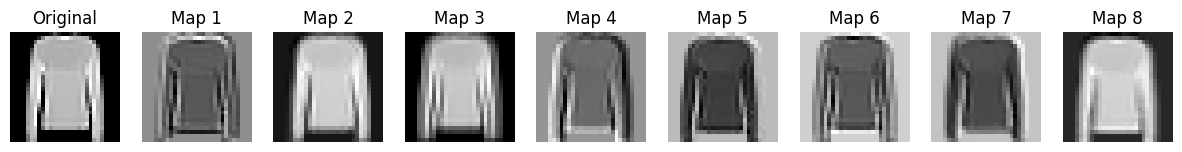

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

transform_gray = transforms.ToTensor()

# Load Fashion MNIST
train_f = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=transform_gray, download=True)

trainloader_f = torch.utils.data.DataLoader(train_f, batch_size=1, shuffle=True)

# Get one sample
sample_img, sample_label = next(iter(trainloader_f))
sample_img = sample_img.to(device)

# Define same simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(8 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

# Dummy training for demonstration (optional for real training)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Pass full training data for quick training
train_all = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=transform_gray, download=True)
trainloader_all = torch.utils.data.DataLoader(train_all, batch_size=len(train_all))
X_train_f, y_train_f = next(iter(trainloader_all))
X_train_f, y_train_f = X_train_f.to(device), y_train_f.to(device)

epochs = 20  # small for quick test
for epoch in range(epochs):
    logits = model(X_train_f)
    loss = loss_fn(logits, y_train_f)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Get feature maps
with torch.no_grad():
    conv_output = model.conv(sample_img)
    feature_maps = conv_output.cpu().squeeze()

print("Feature map shape:", feature_maps.shape)

# Plot original + all feature maps
n_maps = feature_maps.shape[0]

plt.figure(figsize=(15, 2))

# Original image
plt.subplot(1, n_maps + 1, 1)
plt.imshow(sample_img.cpu().squeeze(), cmap="gray")
plt.title("Original")
plt.axis("off")

# Each feature map
for i in range(n_maps):
    plt.subplot(1, n_maps + 1, i + 2)
    plt.imshow(feature_maps[i], cmap="gray")
    plt.title(f"Map {i+1}")
    plt.axis("off")

plt.show()

# Why Input, Output, and Loss Function Are Everything

---

When building **deep learning models**, the architecture (layers, neurons, activation functions) often gets the spotlight. But at a deeper level, the real **heart** of any deep learning system is this:

**How you format the input**  
**What you expect as output**  
**How you define the loss function to compare output to the ground truth**

---

## The Universal Pattern

Every deep learning task follows this logic:

**Input**: Data format  
**Model**: A function $f(x; \theta)$ parameterized by weights $\theta$  
**Output**: Prediction $\hat{y} = f(x; \theta)$  
**Loss**: $L(\hat{y}, y)$, the cost of being wrong

---

## Why the Loss Function Defines the Problem

A **loss function** is a precise mathematical contract:

$$
\min_{\theta} \; L(\hat{y}, y)
\quad \text{where} \quad
\hat{y} = f(x; \theta).
$$

This simple equation drives all training.

- If your output is **one class out of many**, you use **cross-entropy loss**.
- If your output is **a continuous number**, you use **mean squared error (MSE)**.
- If your output is **multiple structured elements** (like bounding boxes + labels), you use **composite losses**.

---

## Example: Object Detection

Let’s break it down:
- **Input**: An image.
- **Output**:  
   - Bounding boxes: coordinates $(x, y, w, h)$ for each detected object.  
   - Class labels: what object is inside each box.
- **Loss function**: A combination:
   1. **Localization loss**: how close the predicted box is to the true box.
   2. **Classification loss**: how well the class label matches.

---

## Common Detection Loss: Multi-Task Loss

$$
L = L_{\text{cls}} + \lambda L_{\text{loc}}
$$

- $L_{\text{cls}}$: Cross-entropy loss over predicted object classes.
- $L_{\text{loc}}$: Smooth L1 loss (or IoU loss) for bounding box coordinates.
- $\lambda$: Weighting factor.

This **multi-task loss** ensures the model learns **where** and **what** simultaneously.

---

## Example: Hugging Face Pre-trained Detector

Below, we’ll run an example with an existing **object detection model** (like DETR or YOLOv8) from Hugging Face Transformers — so you can see how the input, output, and loss align **in practice**.

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


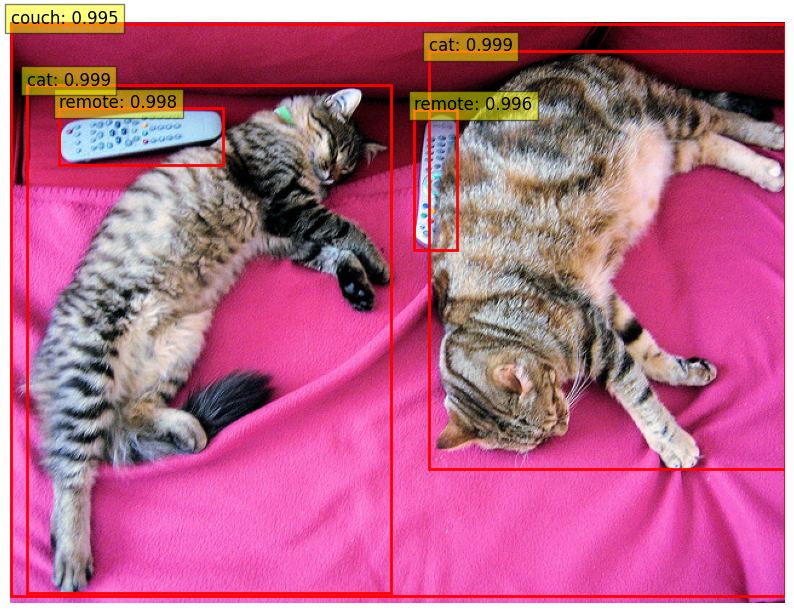

In [25]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------
# Load image
# -------------------------------------
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# -------------------------------------
# Load processor + model
# -------------------------------------
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# -------------------------------------
# Forward pass
# -------------------------------------
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, threshold=0.9, target_sizes=target_sizes
)[0]

# -------------------------------------
# Plot
# -------------------------------------
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    xmin, ymin, xmax, ymax = box
    ax.add_patch(patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, edgecolor='red', linewidth=2))
    ax.text(xmin, ymin, f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}",
            fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis("off")
plt.show()

# Semantic Image Segmentation: Input, Output, and Loss

---

## What is Segmentation?

In **semantic segmentation**, our goal is to assign a **class label to each pixel** of an input image.

Example:
- Input: RGB image of size $H \times W \times 3$
- Output: Label map of size $H \times W$, where each pixel has a class index.

---

## How This Changes the Problem

Unlike image classification (one label for whole image) or object detection (boxes + labels), segmentation requires:

- **Same resolution output**: The output must align with the original image pixels.
- **Pixel-wise prediction**: The network must learn **spatial context** and **local details**.
- **Structured output**: A grid of predictions instead of a single vector.

---

## Mathematical Formulation

**Model**:  

$$
\hat{Y} = f(X; \theta), \quad \hat{Y} \in \mathbb{R}^{H \times W \times C}
$$

where:
- $X$ is the input image.
- $\hat{Y}$ is the per-pixel class probability tensor.
- $C$ is the number of classes.
- For each pixel $(i,j)$, $\hat{Y}_{i,j}$ is a probability vector:

$$
\hat{Y}_{i,j} \in [0,1]^C, \quad \sum_{c=1}^C \hat{Y}_{i,j,c} = 1.
$$

---

## Loss Function: Pixel-wise Cross-Entropy

The **loss** compares the predicted class probability for every pixel to the true class.

$$
L = -\frac{1}{H W} \sum_{i=1}^H \sum_{j=1}^W \sum_{c=1}^C Y_{i,j,c} \log(\hat{Y}_{i,j,c})
$$

where:
- $Y_{i,j,c} = 1$ if the pixel $(i,j)$ belongs to class $c$, else 0.

---

## Why This Matters

The **output format** is not just a single label, but a dense grid.
So the architecture must:
- Keep spatial information (CNN with skip connections).
- Upsample low-resolution features back to original resolution (decoder / upsampling layers).
- Match input/output shapes exactly.

---

## Typical Input/Output for Segmentation

| Element | Shape |
|----------------|-----------------------------|
| Input image | $H \times W \times 3$ |
| Output tensor | $H \times W \times C$ |
| Ground truth mask | $H \times W$ (integer class indices) |
| Loss | Pixel-wise cross-entropy |

---

## Example: Using a Pretrained Segmentation Model (Hugging Face)

Below, we’ll see this using a pretrained **DeepLabV3** model.  
You’ll see how:
- The input is an image.
- The output is a per-pixel probability map.
- The post-processing converts this to a segmentation mask.

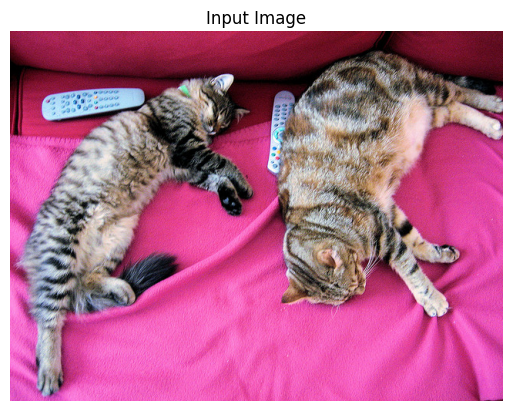

Output mask shape: (480, 640)


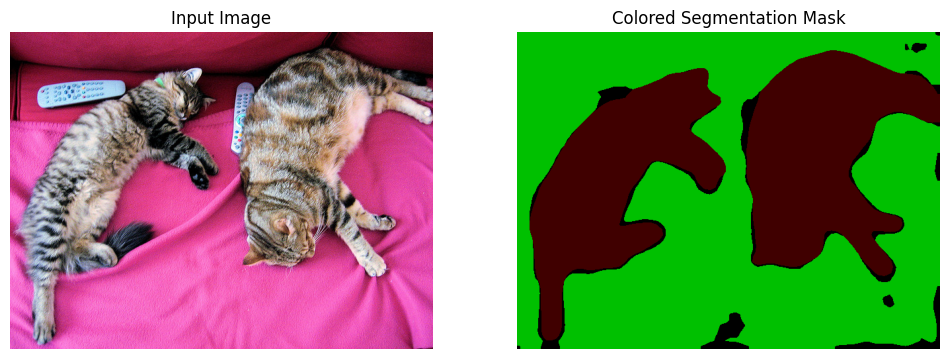

In [24]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Download sample image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/coco_sample.png"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

plt.imshow(image)
plt.title("Input Image")
plt.axis("off")
plt.show()

# Transform
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image).unsqueeze(0)

# Load DeepLabV3 model
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

with torch.no_grad():
    output = model(input_tensor)["out"][0]  # Shape: [21, H, W]

output_predictions = output.argmax(0).byte().cpu().numpy()

print("Output mask shape:", output_predictions.shape)

# VOC color map
VOC_COLORMAP = np.array([
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
    [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
    [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
    [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
    [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
    [0, 64, 128],
], dtype=np.uint8)

def decode_segmap(mask):
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    for l in range(0, len(VOC_COLORMAP)):
        idx = mask == l
        r[idx] = VOC_COLORMAP[l, 0]
        g[idx] = VOC_COLORMAP[l, 1]
        b[idx] = VOC_COLORMAP[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

colored_mask = decode_segmap(output_predictions)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(colored_mask)
plt.title("Colored Segmentation Mask")
plt.axis("off")
plt.show()

# Monocular Depth Estimation

---

## What is Depth Estimation?

Depth estimation predicts the **distance** of each pixel in an image to the camera.  
It turns a single RGB image into a dense **depth map**.

Example:  
- Input: $I \in \mathbb{R}^{H \times W \times 3}$
- Output: $D \in \mathbb{R}^{H \times W}$

---

## What changes here?

Unlike segmentation:
- There are **no discrete classes**.
- The output is **continuous** — real values in meters or relative scale.
- The loss is **regression loss**, not classification loss.

---

## Loss Function

The most common is the **Mean Squared Error (MSE)**:

$$
L = \frac{1}{HW} \sum_{i,j} (Y_{i,j} - \hat{Y}_{i,j})^2
$$

- $Y$ is the true depth.
- $\hat{Y}$ is the predicted depth.

Sometimes people use:
- **Scale-invariant loss** (e.g., Eigen et al.):

$$
L = \frac{1}{n} \sum_i d_i^2 - \frac{\lambda}{n^2} \left( \sum_i d_i \right)^2
\quad \text{where} \quad d_i = \log \hat{Y}_i - \log Y_i
$$

This encourages the **shape** of the depth to be correct even if the absolute scale shifts.

---

## Input/Output Shapes

| Element | Shape | Note |
| ------- | ----- | ---- |
| RGB Image | $(H, W, 3)$ | Standard |
| Predicted Depth | $(H, W)$ | Continuous |
| GT Depth | $(H, W)$ | Continuous |
| Loss | Regression | e.g. MSE |

---

## Key Difference

- **Classification:** Softmax + cross-entropy loss.
- **Segmentation:** Pixel-wise cross-entropy.
- **Depth:** Pixel-wise regression with MSE.

---

Below is a working Hugging Face + PyTorch example.

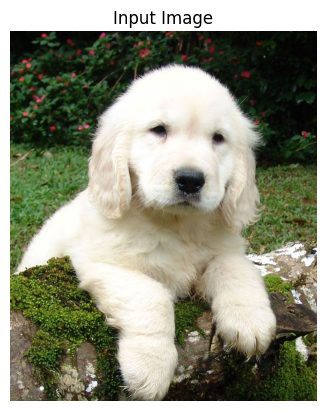

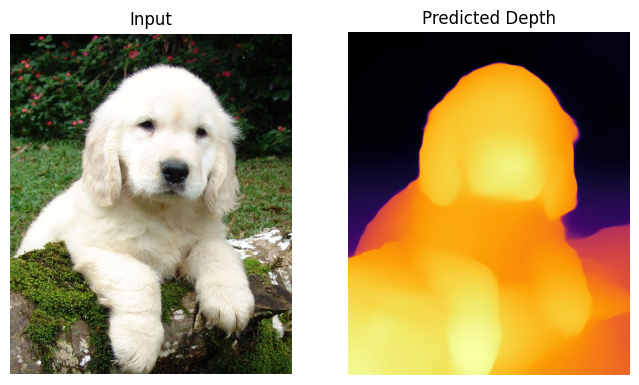

In [28]:
# !pip install torch torchvision transformers matplotlib

import torch
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load image
url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
plt.imshow(image)
plt.title("Input Image")
plt.axis("off")
plt.show()

# Load processor and model
model_id = "LiheYoung/depth-anything-small-hf"
processor = AutoImageProcessor.from_pretrained(model_id)
model = AutoModelForDepthEstimation.from_pretrained(model_id)

# Preprocess
inputs = processor(images=image, return_tensors="pt")

# Predict depth
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth.squeeze().cpu().numpy()

# Normalize for display
depth_min = predicted_depth.min()
depth_max = predicted_depth.max()
depth_vis = (predicted_depth - depth_min) / (depth_max - depth_min)

# Show depth map
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(depth_vis, cmap="inferno")
plt.title("Predicted Depth")
plt.axis("off")
plt.show()

Modern learning-based models show how powerful function approximators like neural networks can learn rich, flexible representations from data, transforming raw inputs, whether simple vectors or complex images, into meaningful outputs for tasks like classification, object detection, segmentation, or depth estimation. By carefully choosing the right input format, output structure, and loss function, we adapt the same core learning principles to solve very different problems, proving that with the right data and architecture, a trainable model can generalize to nearly any perception challenge in computer vision.